## Data Exploration and Preprocessing

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [23]:
# Load dataset
df = pd.read_csv(r"C:\Users\gopin\OneDrive\Desktop\Customers.csv")

In [25]:
# Check for missing values
print(df.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [27]:
# Convert categorical variables to numerical (if necessary)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Profession'] = label_encoder.fit_transform(df['Profession'])

In [29]:
# Handle outliers, missing values, etc. (if applicable)
# Example: Remove rows with missing values
df = df.dropna()

In [31]:
# Explore data (e.g., basic statistics, visualizations)
print(df.describe())

        CustomerID       Gender          Age  Annual Income ($)  \
count  2000.000000  2000.000000  2000.000000        2000.000000   
mean   1000.500000     0.407000    48.960000      110731.821500   
std     577.494589     0.491398    28.429747       45739.536688   
min       1.000000     0.000000     0.000000           0.000000   
25%     500.750000     0.000000    25.000000       74572.000000   
50%    1000.500000     0.000000    48.000000      110045.000000   
75%    1500.250000     1.000000    73.000000      149092.750000   
max    2000.000000     1.000000    99.000000      189974.000000   

       Spending Score (1-100)   Profession  Work Experience  Family Size  
count             2000.000000  2000.000000      2000.000000  2000.000000  
mean                50.962500     2.938500         4.102500     3.768500  
std                 27.934661     2.649194         3.922204     1.970749  
min                  0.000000     0.000000         0.000000     1.000000  
25%                 2

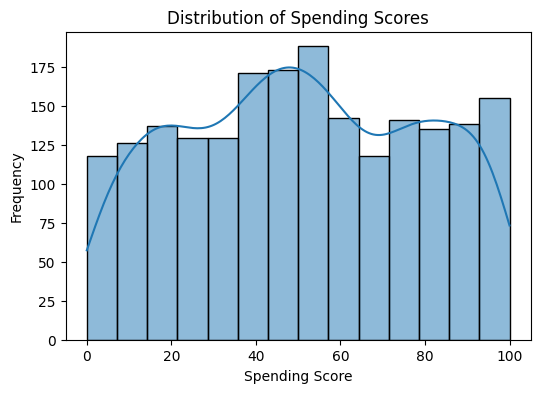

In [7]:
# Plot a histogram of the Spending Score
plt.figure(figsize=(6, 4))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Scores')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

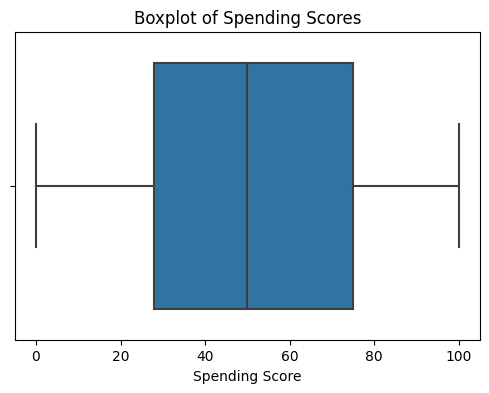

In [8]:
# Boxplot for Spending Score
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Scores')
plt.xlabel('Spending Score')
plt.show()

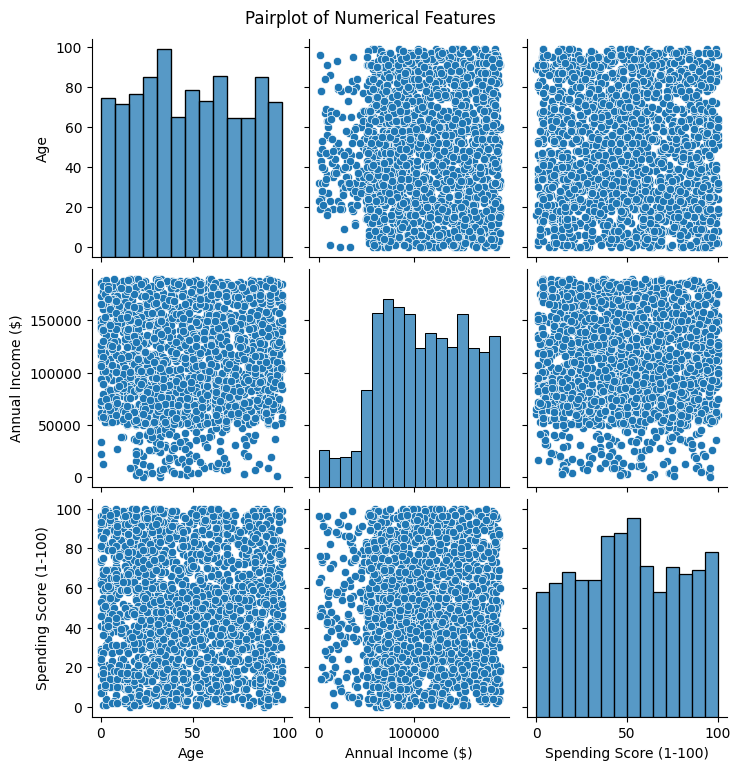

In [10]:
# Pairplot for numerical features
numerical_features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### Clustering (K-Means)

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
# Select numerical features for clustering
X = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

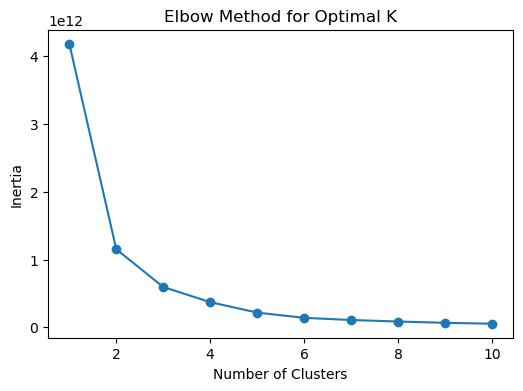

In [37]:
# Apply the Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

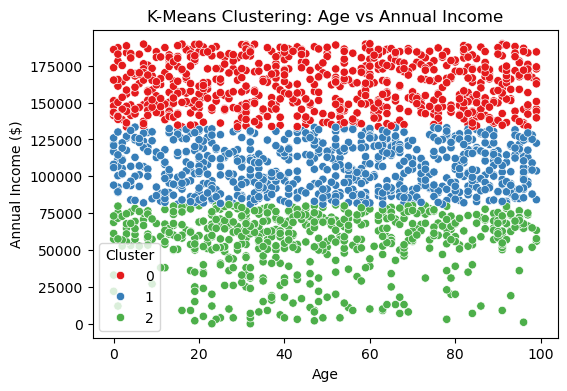

In [39]:
# Plot the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Annual Income ($)'], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.show()

In [41]:
# Calculate Silhouette Score for clustering evaluation
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5576318115237571


### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
# Select variables for regression (e.g., Annual Income vs Spending Score)
X = df[['Annual Income ($)']]
y = df['Spending Score (1-100)']

In [45]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [47]:
# Predict the Spending Score
df['Predicted Spending Score'] = model.predict(X)